In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [10]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [11]:
L_naught = 3**20 * np.exp(-3*sum(my_data))
L_ML = ((1/np.mean(my_data))**20 * (np.exp((-1/np.mean(my_data))*sum(my_data))))
big_lambda = L_naught / L_ML
log_of_BL = -2 * np.log(big_lambda)
print(big_lambda)
print(log_of_BL)
print(1-stats.chi2.cdf(log_of_BL,1))

0.09445694279678164
4.719222360188457
0.029827229194775207


The p-value of the null hypothesis is 0.0298 which is smaller than 0.05. Therefore we have evidence to reject the null. 

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [12]:
crit_val = stats.chi2.ppf(.95,1)
crit_val

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [13]:
ts = []
for _ in np.arange(10000):
    data = stats.expon.rvs(size=20, scale = 1/5)
    L_naught = 3**20 * np.exp(-3*sum(data))
    L_ML = ((1/np.mean(data))**20 * (np.exp((-1/np.mean(data))*sum(data))))
    big_lambda = L_naught / L_ML
    log_of_BL = -2 * np.log(big_lambda)
    ts = np.append(ts, log_of_BL)

np.mean(ts>=crit_val)

0.5935

Repeat for a sample size of 50. What do you expect to happen to power? 

In [14]:
ts = []
for _ in np.arange(10000):
    data = stats.expon.rvs(size=50, scale = 1/5)
    L_naught = 3**50 * np.exp(-3*sum(data))
    L_ML = ((1/np.mean(data))**50 * (np.exp((-1/np.mean(data))*sum(data))))
    big_lambda = L_naught / L_ML
    log_of_BL = -2 * np.log(big_lambda)
    ts = np.append(ts, log_of_BL)

np.mean(ts>=crit_val)

0.9494

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

In [18]:
obsmean = np.mean(my_data)

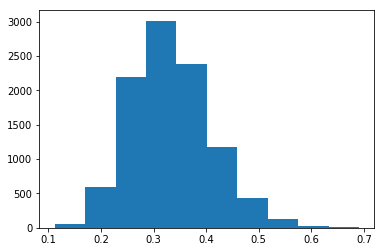

In [19]:
ts = []
for _ in np.arange(10000):
    rs = stats.expon.rvs(size=20,scale=1/3)
    ts = np.append(ts, np.mean(rs))
plt.hist(ts)
plt.show()

In [20]:
2*np.mean(ts<=obsmean)

0.0382

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [21]:
lower,upper = np.percentile(ts,[2.5,97.5])
print(lower)
print(upper)

0.20155412393036443
0.494784060610768


Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [23]:
tspower = []
for _ in np.arange(10000):
    rspower = stats.expon.rvs(size=20, scale=1/5)
    tspower = np.append(tspower, np.mean(rspower))
np.mean(tspower<=lower)+np.mean(tspower>=upper)

0.5447

The power of the example is .54 for a sample size of 20. This is less than the liklihood power for our sample.

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [27]:
ts50 = []
for _ in np.arange(10000):
    rs = stats.expon.rvs(size=50,scale=1/3)
    ts50 = np.append(ts50, np.mean(rs))
lower50,upper50= np.percentile(ts50,[2.5,97.5])

In [28]:
tspower = []
for _ in np.arange(10000):
    rspower = stats.expon.rvs(size=50, scale=1/5)
    tspower = np.append(tspower, np.mean(rspower))
np.mean(tspower<=lower50)+np.mean(tspower>=upper50)

0.9455